# Random Forest with Grid Search Cross Validation

Dataset：https://www.kaggle.com/datasets/shrutipandit707/heartdisease

Algorithm: Random Forest

Hyperparameter tuning: Grid Search cross validation

==========

Final result:
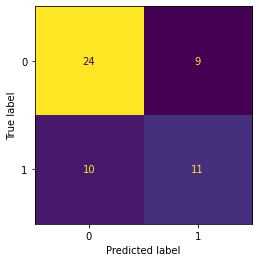

Optimal Hyperparameters:

RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=10,
                       n_estimators=10, oob_score=True, random_state=42)
                       
                       
==========             

Note: 
【About RF with this dataset】
Properly not the best fit


【About Grid Search】
Grid Search took a lots of time to search for the optimal hyperparemeter
If encounter a larger hyper-set it properly will run hours

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import time

In [2]:
df=pd.read_csv('heart_v2.csv')

In [3]:
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
y=df['heart disease']
X= df.drop('heart disease',axis=1)

In [6]:
df['heart disease'].value_counts() #balanced dataset

0    150
1    120
Name: heart disease, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(216, 4) (54, 4)
(216,) (54,)


# Random Forest

In [8]:
rf=RandomForestClassifier(n_estimators=10,n_jobs=-1,max_depth=5,random_state=42,oob_score=True)

In [9]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=42)

In [10]:
rf.oob_score_

0.6064814814814815

In [11]:
pred=rf.predict(X_test)

In [12]:
accuracy_score(y_test, pred)

0.6481481481481481

In [13]:
confusion_matrix(y_test, pred)

array([[25,  8],
       [11, 10]], dtype=int64)

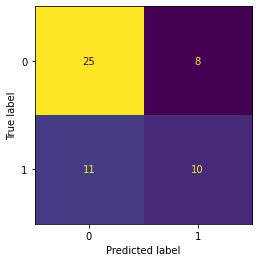

In [14]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(rf, X_test, y_test, colorbar=False)

# Grid Search

In [37]:
n_estimators = [10, 100,500,1000]
max_depth = [ 2,  5, 10]
min_samples_leaf= [5, 10, 20]
max_features=[2,3,4]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_features=max_features)

In [40]:
newrf = RandomForestClassifier(random_state=42)
grid=GridSearchCV(estimator=newrf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1,scoring='accuracy')

In [41]:
start = time.time()

grid_result = grid.fit(X_train, y_train)

end = time.time()

# 輸出結果

print("執行時間：%f 秒" % (end - start))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
執行時間：98.230928 秒


In [42]:
print('最佳分類器')
print(grid_result.best_estimator_)
print('\n最佳超參數組合')
print(grid_result.best_params_)
print('\n最佳分類器與超參數組合分類結果')
print(grid_result.best_score_)

最佳分類器
RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=10,
                       n_estimators=10, random_state=42)

最佳超參數組合
{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 10, 'n_estimators': 10}

最佳分類器與超參數組合分類結果
0.6851851851851851


# Optimal RF

In [43]:
optimalrf = RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=10,
                       n_estimators=10, random_state=42,oob_score=True)

In [44]:
optimalrf .fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=10,
                       n_estimators=10, oob_score=True, random_state=42)

In [45]:
optimalrf .oob_score_

0.6203703703703703

In [46]:
pred=optimalrf.predict(X_test)

In [47]:
accuracy_score(y_test, pred)

0.6481481481481481

In [48]:
confusion_matrix(y_test, pred)

array([[24,  9],
       [10, 11]], dtype=int64)

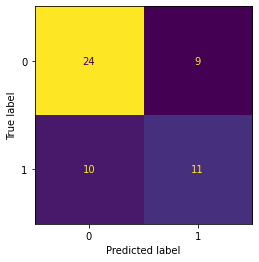

In [49]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(optimalrf, X_test, y_test, colorbar=False)